Колись я попросив, щоб студенти відповіли на два питання анкети «ваш рік народження» і «ваш вік».

З їх відповідей я сформував таблицю, в якій був стовпець Р=«рік народження студента» та Q=«вік студента».

Виявляється, значення коефіцієнта кореляції змінних P і Q залежить від місяця, в якому проводилося анкетування (це не жарт!). Укажіть два місяці, що відповідають найменшому (за модулем) значенню коефіцієнта кореляції, яким визнані P і Q.

# Задамо респондентів в діапазоні 1 січня 1989 року до 1 січня 2006 року

In [1]:
import pandas as pd
import calendar
import datetime

data = pd.DataFrame({"birthday" : pd.date_range(start='1/1/1989', end='1/1/2006', periods=100)})

# Для початку припустимо, що опитування проходило в жовтні 2021 року

In [2]:
year_of_survey = '2021'
date_of_survey = datetime.datetime.strptime(year_of_survey+'October', '%Y%B')

# Трансформація дати

**DATETIME**
Зберігає час у вигляді цілого числа виду YYYYMMDDHHMMSS, використовуючи при цьому 8 байтів. Цей час залежить від часової зони.

**TIMESTAMP**
Зберігає 4-байтне ціле число, що дорівнює кількості секунд, що пройшли з півночі 1 січня 1970 за усередненим часом Грінвіча (тобто нульовий часовий пояс, точка відліку часових поясів). При отриманні з бази відображається з урахуванням часового поясу.

In [3]:
# тип дати datetime
date_of_survey

datetime.datetime(2021, 10, 1, 0, 0)

In [4]:
# datetime конвертуємо до timestamp
datetime.datetime.timestamp(date_of_survey)

1633035600.0

In [5]:
datetime.datetime.timestamp(data.birthday[0])

599608800.0

In [6]:
# розрахуємо різницю в форматі datetime
date_of_survey - datetime.datetime.fromtimestamp(datetime.datetime.timestamp(data.birthday[0]))

datetime.timedelta(days=11961)

In [7]:
# розрахуємо різницю в форматі timestamp
pd.to_datetime(date_of_survey) - data.birthday[0]

Timedelta('11961 days 00:00:00')

In [8]:
# розрахуємо різницю в форматі timestamp та отримаємо повний вік на час опитування
data.birthday.apply(lambda x: int((pd.to_datetime(date_of_survey) - x).days/365.2425))

0     32
1     32
2     32
3     32
4     32
      ..
95    16
96    16
97    16
98    15
99    15
Name: birthday, Length: 100, dtype: int64

In [9]:
# Розрахуємо повний вік в залежності від місяця опитування
for month in list(calendar.month_name)[1:]:
    date_of_survey = datetime.datetime.strptime(year_of_survey+month, '%Y%B')
    data[month] = data.birthday.apply(lambda x: int((pd.to_datetime(date_of_survey) - x).days/365.2425))

In [10]:
# Додамо показник "P" - рік народження
data['year_birthday'] = data.birthday.apply(lambda x: x.year)

In [11]:
# Проведемо кореляційний аналіз
cor = data.drop('birthday', axis=1).corr()['year_birthday']
cor

January         -0.999600
February        -0.998166
March           -0.997118
April           -0.996115
May             -0.995428
June            -0.995088
July            -0.994912
August          -0.995123
September       -0.995488
October         -0.996193
November        -0.997252
December        -0.998501
year_birthday    1.000000
Name: year_birthday, dtype: float64

### Як видно скрізь висока зворотна (лінійна) залежність, відсортуємо та подивимось у яких двох місяцях найнижчий показник

In [12]:
cor.sort_values(ascending=False)

year_birthday    1.000000
July            -0.994912
June            -0.995088
August          -0.995123
May             -0.995428
September       -0.995488
April           -0.996115
October         -0.996193
March           -0.997118
November        -0.997252
February        -0.998166
December        -0.998501
January         -0.999600
Name: year_birthday, dtype: float64

# Бачимо, що найнижча кореляція в червні та липні

# Завдання заповнити пропущені значення через коефіцієнт кореляції

https://stepik.org/lesson/83191/step/1?unit=59827

In [1]:
import pandas as pd
import numpy as np
from numpy import NaN
from sklearn import preprocessing

df = pd.DataFrame({'bust':[99,89,91,91,86,97,NaN], 
              'waidt':[56,58,64,51,56,53,51], 
              'hips':[91,89,91,91,84,86,91], 
              'height':[160,157,165,170,157,175,165], 
              'weight':[58,48,54,54,44,56,54]}, index=['W1','W2','W3','W4','W5','W6','A'])
df

,bust,waidt,hips,height,weight
W1,99.0,56,91,160,58
W2,89.0,58,89,157,48
W3,91.0,64,91,165,54
W4,91.0,51,91,170,54
W5,86.0,56,84,157,44
W6,97.0,53,86,175,56
A,NaN,51,91,165,54


Припустимо $P(A)$ - значення змінної $Р$ об'єкта $А$  
$\overline{P}$ - середнє значення змінної $P$  
Потрібно визначити $P(A)$ за стовбцями-змінними $P_1, P_2, ..., P_m$  
$$P(A)=\overline{P} + \frac{\sum_{j=1}^{n}r(P,P_i)(P_i(A)-\overline{P})}{\sum_{i=1}^{m}\left| r(P,P_i) \right|}$$  
**Примітка:** в формулі всі велечини обчислюються без урахування рядка об'єкта $A$

Потрібно для кожного стовпця підрахувати його середнє та КК (коефіцієнт кореляції) всіх стовпців з 1-м стовпцем (без використання останнього рядка).

In [2]:
means = df.drop('A', axis=0).mean() # середнє
means

bust       92.166667
waidt      56.333333
hips       88.666667
height    164.000000
weight     52.333333
dtype: float64

In [3]:
# коефіцієнти кореляції
weights = df.drop('A', axis=0).corr().bust.drop('bust') # так як втрачене значення bust
weights

waidt    -0.219903
hips      0.342287
height    0.457826
weight    0.906844
Name: bust, dtype: float64

In [4]:
P_ = df.drop('A', axis=0).mean().bust
sum_abs_r = sum(np.absolute(df.drop('A', axis=0).corr().bust.drop('bust')))

# втрачене значення
P_ + 1/sum_abs_r * np.sum((df.loc['A'] - means) * weights)

94.2118178524154

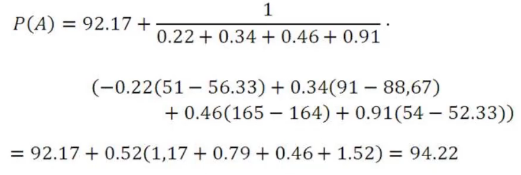

Задано два вектори значень ознак Р1=(0,1,2) Р2=(2,1,0). Розрахувати відстані Euclid, Manhatten та Max

In [5]:
import numpy
P1 = numpy.array([0,1,2])
P2 = numpy.array([2,1,0])

Euclid= numpy.linalg.norm(P1-P2)
Manhatten= numpy.linalg.norm(P1 - P2,ord=1)
Max = max(numpy.abs(P1-P2))
print(f'{Euclid=} {Manhatten=} {Max =}')

Euclid=2.8284271247461903 Manhatten=4.0 Max =2


Заданний вектор має значення змінної Р=(1,0,5,2,2). Нормалізуємо цей вектор за формулою, що використовує мінімальне та максимальне значення змінної Р. Значення першої координати нормалізованого вектора буде рівним:

In [6]:
import numpy as np
a = np.array([1,0,5,2,2])

np.vectorize(lambda x: (x - a.min())/(a.max() - a.min()))(a)

array([0.2, 0. , 1. , 0.4, 0.4])

In [7]:
a = np.array([1, 0, 5, 2, 2])
(a-min(a))/(max(a)-min(a))

array([0.2, 0. , 1. , 0.4, 0.4])

Заданий вектор має значення змінної P=(1,0,5,2,2). Нормалізуємо цей вектор за формулою, що використовує середнє значення та відхилення змінної Р. Значення останньої координати нормалізованого вектора буде рівним

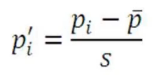

In [8]:
P = np.array([1,0,5,2,2]) # mean = 2.0 std = 1.6733
(P-P.mean())/P.std()

array([-0.5976143 , -1.19522861,  1.79284291,  0.        ,  0.        ])

Наступна таблиця містить інформацію про оцінки, виставлені фільми.
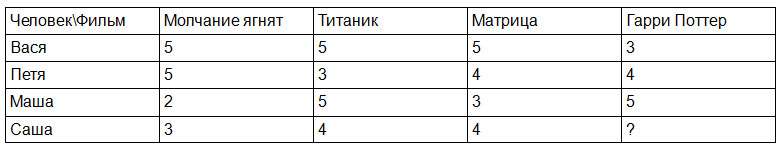

Потрібно оцінити, яку оцінку поставити Саші за фільм «Гаррі Поттер». Робимо це за допомогою метрики Манхеттена (для простоти вирахування даних у таблиці нормувати не потрібно). Для цього підсчитаємо перебування від Саші до інших людей, використовуючи інформацію з перших 3 столбців. Що рівно очікувана оцінка для «Гаррі Поттера» (округлити до одного знака після зап'ятої)?

In [9]:
Vasya = np.array([5,5,5])
Petya = np.array([5,3,4])
Masha = np.array([2,5,3])
Sasha = np.array([3,4,4])
Harry_potter = [3,4,5]
S_V = numpy.linalg.norm(Sasha - Vasya,ord=1) # Out: 4
S_P = numpy.linalg.norm(Sasha - Petya,ord=1) # Out: 3
S_M = numpy.linalg.norm(Sasha - Masha,ord=1) # Out: 3
1/(1/S_V+1/S_P+1/S_M)*(Harry_potter[0]/S_V + Harry_potter[1]/S_P + Harry_potter[2]/S_M)

4.090909090909092

In [10]:
# https://stepik.org/lesson/83241/step/5?thread=solutions&unit=59876
import numpy as np

data = {
    "Молчание ягнят": [5, 5, 2, 3],
    "Титаник": [5, 3, 5, 4],
    "Матрица": [5, 4, 3, 4],
    "Гарри Поттер": [3, 4, 5, np.NaN]
}
df = pd.DataFrame(data=data, index=["Вася", "Петя", "Маша", "Саша"])    # создание дф
display(df)

matrix = df.iloc[:, :].to_numpy()   # выгружаю данные в нампи
display(matrix)

column = 3
row = 3

def metric(a, b):
    return np.sum(np.abs(a - b), axis=1)

submatrix = np.delete(matrix, column, 1)    # матрица без целевого столбца фильма
print(f"submatrix = ", submatrix)

# normalize
# sub_min = np.min(submatrix)
# sub_max = np.max(submatrix)
# submatrix = (submatrix - sub_min) / (sub_max - sub_min)

metrics = metric(submatrix[row, :], np.delete(submatrix, row, 0))
print(f"metrics = ", metrics)

v1 = 1/np.sum(1/metrics)    # нормирующтй множитель
v2 = np.delete(matrix[:, column], row)  # значения в столбце с искомым элементом
v3 = v2 @ (1/metrics)       # поэлементное произведение из столбца и мер близостей
v = v1 * v3     # значение в ячейке matrix[row, col]
display(v)

,Молчание ягнят,Титаник,Матрица,Гарри Поттер
Вася,5,5,5,3.0
Петя,5,3,4,4.0
Маша,2,5,3,5.0
Саша,3,4,4,NaN


array([[ 5.,  5.,  5.,  3.],
       [ 5.,  3.,  4.,  4.],
       [ 2.,  5.,  3.,  5.],
       [ 3.,  4.,  4., nan]])

submatrix =  [[5. 5. 5.]
 [5. 3. 4.]
 [2. 5. 3.]
 [3. 4. 4.]]
metrics =  [4. 3. 3.]


4.090909090909091

Таблиця містить відомості про замовлення анонімних користувачів в інтернет-магазині.
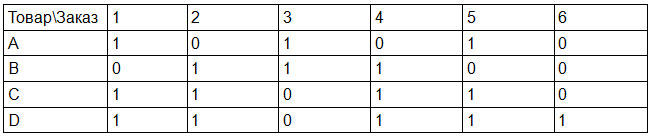
По рядках відкладено найменування товарів, а стовпці — номери замовлень (у комірці стоїть 1, якщо товар входить у відповідне замовлення; 0 — інакше). При побудові рекомендаційної системи необхідно оцінити рівень схожості товарів з допомогою обчислення евклидовой метрики. Найбільш схожим (близьким) на товар A буде товар С і відстань між цими товарами дорівнює

In [11]:
from scipy.spatial import distance

items = [[1, 0, 1, 0, 1, 0], [1, 1, 0, 1, 1, 0]]
round(distance.pdist(items, metric='euclidean').item(), 2)

# или просто round(sum((x - y)**2 for x, y in zip(*items))**.5, 2)

1.73